In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/readme_licence.txt
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/409790_426420.tif
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/411320_344190.tif
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/407120_391320.tif
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/414650_433770.tif
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/412880_452790.tif
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/407690_455430.tif
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/407390_331470.tif
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/412220_403230.tif
/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai/data_100/lr/410540_389220.tif
/kaggle/input/super-r

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
os.listdir('/kaggle/input')

['super-resolution-austria-dtm-fastai']

In [4]:
# try to do it with tabular

In [5]:
import glob 

In [6]:
PATH = '/kaggle/input/super-resolution-austria-dtm-fastai/austria_dtm_fastai'
os.listdir(PATH)

['data_100', 'data_test_100', 'readme_licence.txt', 'data']

save to jzphlp/kaggle

In [7]:
data_100 = os.path.join(PATH,'data_100')
data_test_100 = os.path.join(PATH,'data_test_100')
data = os.path.join(PATH,'data0')

data_100_dpath_lr_us_cc = os.path.join(data_100, 'lr_us_cc') 
data_100_dpath_lr_hr = os.path.join(data_100, 'hr') 
data_100_dpath_lr_lr = os.path.join(data_100, 'lr') 
data_100_dpath_lr_us_nn = os.path.join(data_100, 'lr_us_nn') 

In [8]:
fs_lr_us_cc = glob.glob(f'{data_100_dpath_lr_us_cc}/*.tif'); print(len(fs_lr_us_cc))
fs_hr = glob.glob(f'{data_100_dpath_lr_hr}/*.tif'); print(len(fs_hr))

100
100


In [9]:
import rasterio
import matplotlib.pyplot as plt

In [10]:
def load_raster(path):
    with rasterio.open(path) as src: da = src.read(1, masked=True)
#         da = src.read(1, masked=True)
#         ndv = src.nodata
#         da[da==ndv] = np.nan
    return da 

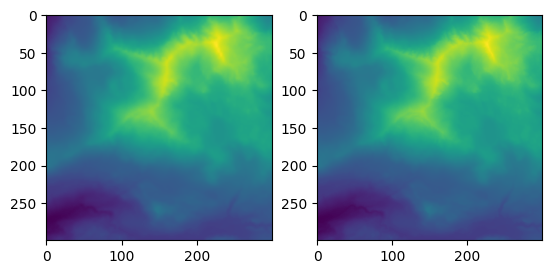

In [11]:
idx = np.random.randint(0, len(fs_lr_us_cc))
dal = load_raster(fs_lr_us_cc[idx])
dah = load_raster(fs_hr[idx])
fig, ax = plt.subplots(1,2)
ax[0].imshow(dal)
ax[1].imshow(dah)

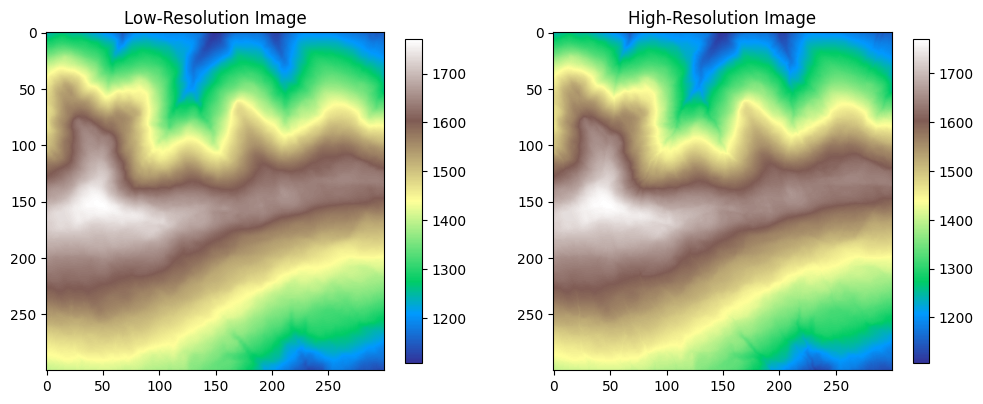

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Assuming `load_raster` is defined somewhere to load raster data
# Also assuming `fs_lr_us_cc` and `fs_hr` are defined lists of file paths

cmap = 'terrain'
idx = np.random.randint(0, len(fs_lr_us_cc))
dal = load_raster(fs_lr_us_cc[idx])
dah = load_raster(fs_hr[idx])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the low-resolution image
im1 = ax[0].imshow(dal, cmap=cmap, norm=Normalize(vmin=dal.min(), vmax=dal.max()))
fig.colorbar(im1, ax=ax[0], orientation='vertical', shrink=0.7)
ax[0].set_title('Low-Resolution Image')

# Display the high-resolution image
im2 = ax[1].imshow(dah, cmap=cmap, norm=Normalize(vmin=dah.min(), vmax=dah.max()))
fig.colorbar(im2, ax=ax[1], orientation='vertical', shrink=0.7)
ax[1].set_title('High-Resolution Image')

plt.show()

# add hillshades

In [13]:
def images_to_df(dal,dah):
    df = pd.DataFrame()
    df['lr'] = dal.flatten()
    df['hr'] = dah.flatten()
    return df

In [14]:
df = images_to_df(dal,dah)

In [15]:
df.describe()

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,lr,hr
count,90000.000000,90000.000000
mean,1467.149902,1467.114990
std,152.892273,152.943253
min,1108.432129,1106.640259
25%,1347.367035,1347.304810
50%,1479.864380,1479.833557
75%,1593.392578,1593.282898
max,1769.565674,1769.598755


In [16]:
import lightgbm